# Objective:
Analyze a dataset of video game sales to find out which regional sales variables share the strongest and weakest correlations. This exercise will help you understand the relationship between different market performances of video games.

# Dataset:
Use the provided dataset containing the following columns: NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales. Each column represents video game sales in North America, Europe, Japan, other regions, and worldwide, respectively.

Load the Data

In [43]:
# import all the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
video_game_sales_df = pd.read_csv('video_game_sales.csv')

Display the first few rows of the dataframe

In [45]:
# Print the first few rows of the DataFrame
video_game_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning

Check for missing values and data types

In [46]:
# Check for missing or null values
video_game_sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [47]:
# Print info about DataFrame
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Our correlation analysis, particularly focusing on sales data, the missing values in the `Year` and `Publisher` columns might not be critical. We will proceed without imputing these missing values.

In [52]:
# If needed for a specific analysis involving the Year or Publisher. Here is how you might implement these steps.

# Convert 'Year' to integer
#video_game_sales_df['Year'] = video_game_sales_df['Year'].astype(int)

# Fill missing 'Publisher' values with 'Unknown'
#video_game_sales_df['Publisher'].fillna('Unknown', inplace=True)

## Exploratory Data Analysis (EDA)

Distributions of our numeric variables and potential relationships between them. We'll focus primarily on visualizing the sales data distributions and then proceed to calculate correlations.

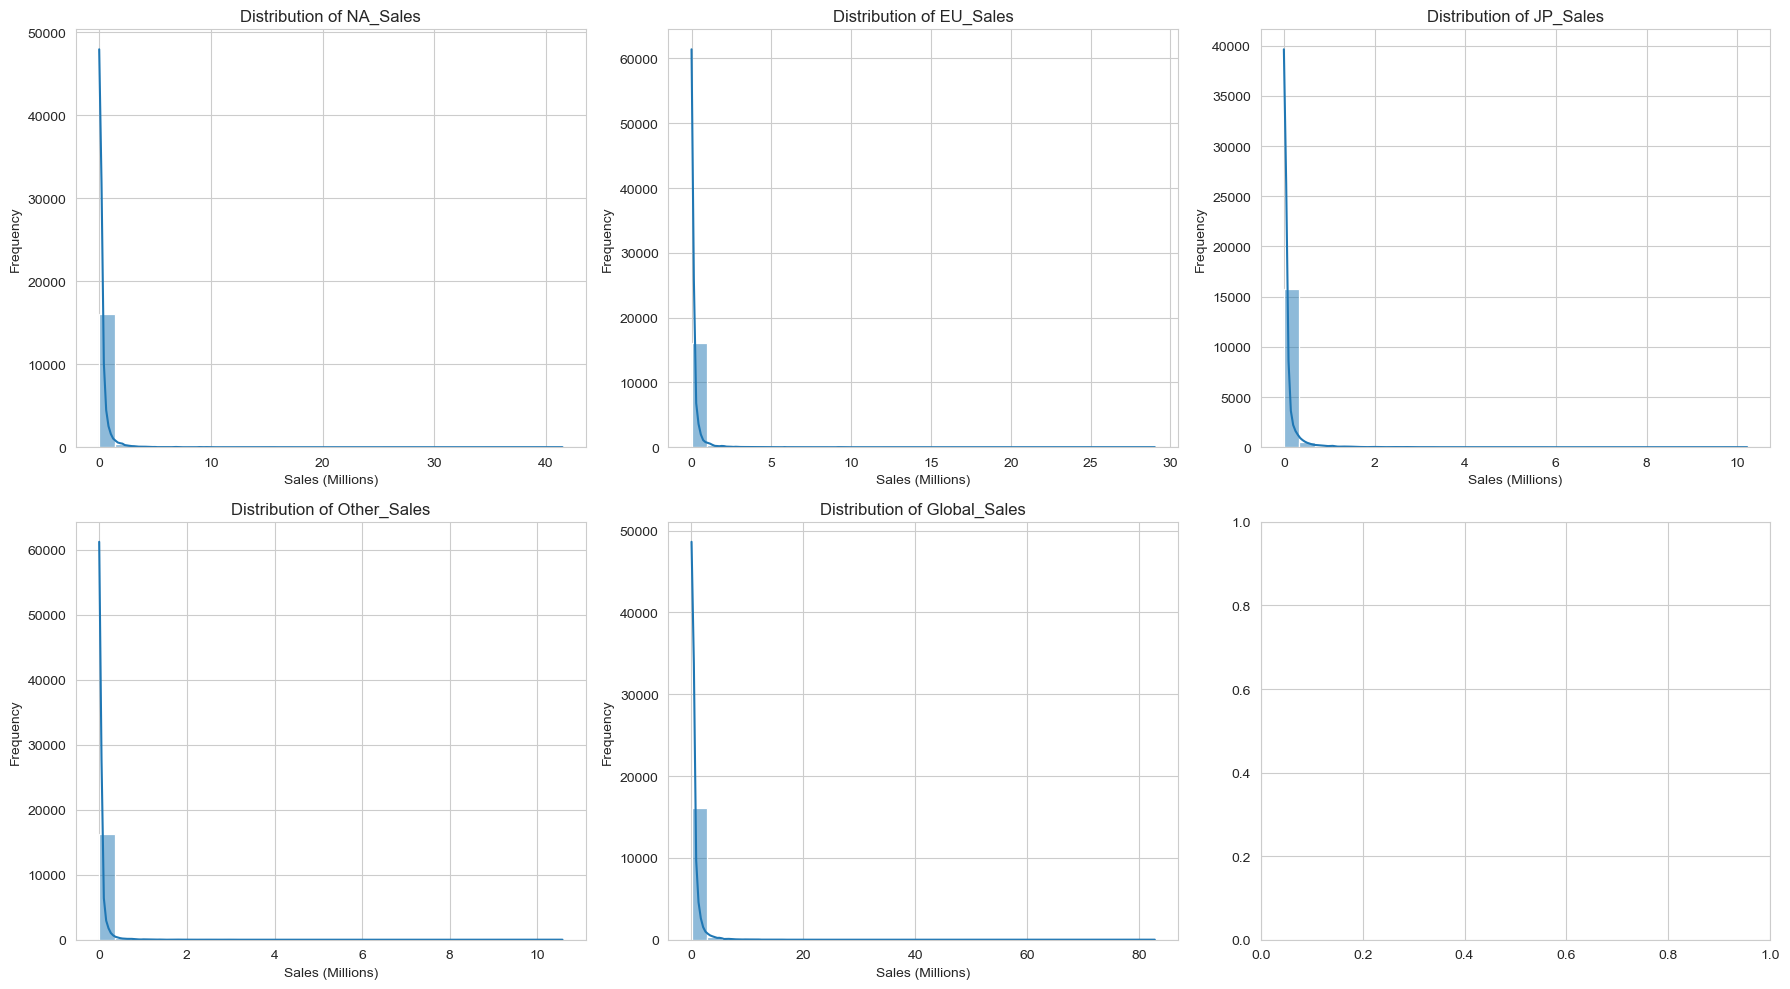

In [49]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distributions of sales data
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# List of sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for ax, column in zip(axs.flat, sales_columns):
    sns.histplot(video_game_sales_df[column], bins=30, ax=ax, kde=True)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Sales (Millions)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [30]:
correlation_matrix = video_game_sales_df[sales_columns].corr()

In [31]:
correlation_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


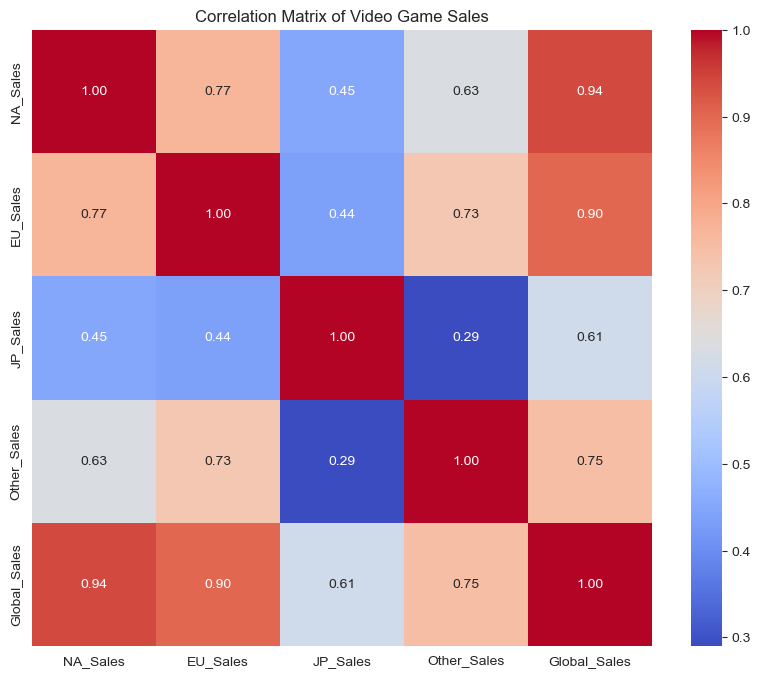

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Video Game Sales')
plt.show()

In [34]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Flatten the matrix and the mask to filter out unwanted pairs
corr_flat = correlation_matrix.mask(mask).stack()

# Find the pair with the strongest correlation (closest to 1 or -1)
strongest_pair = corr_flat.idxmax()
strongest_value = corr_flat.max()

# Find the pair with the weakest correlation (closest to 0)
weakest_pair = corr_flat.abs().idxmin()  # Use abs to find the closest to 0
weakest_value = corr_flat[weakest_pair]

In [35]:
print(f"Strongest Correlation Pair: {strongest_pair}, Correlation Coefficient: {strongest_value}")
print(f"Weakest Correlation Pair: {weakest_pair}, Correlation Coefficient: {weakest_value}")

Strongest Correlation Pair: ('Global_Sales', 'NA_Sales'), Correlation Coefficient: 0.9410473571255574
Weakest Correlation Pair: ('Other_Sales', 'JP_Sales'), Correlation Coefficient: 0.29018624960152634


## Brief interpretation of the correlation findings. 

**Strongest Correlation Pair: Global Sales and North America (NA) Sales**

- **Correlation Coefficient:** 0.941
- **Interpretation:** The strong positive correlation between Global Sales and NA Sales suggests that North America is a significant market for video games, with its sales trends closely mirroring global sales trends. This could be due to several factors, including the size of the market, consumer purchasing power, and the popularity of gaming culture in North America. When a game performs well in North America, it is likely to also perform well globally, indicating that North America can be considered a key indicator of global success for video game titles.

**Weakest Correlation Pair: Other Sales and Japan (JP) Sales**
- **Correlation Coefficient:** 0.290
- **Interpretation:** The weakest correlation between Other Sales and Japan Sales indicates that the sales trends in Japan do not significantly influence or reflect sales trends in other regions of the world (categorized as "Other Sales"). This weaker correlation could be attributed to distinct market preferences, cultural differences, and the type of games that are popular in Japan compared to other regions. Japan has a unique gaming culture with a strong preference for certain genres, such as RPGs (Role-Playing Games), that may not have the same level of popularity in other regions. Additionally, the gaming market in Japan is more inclined towards mobile and handheld gaming, further diverging from trends in other regions that might contribute more to "Other Sales."

These correlation findings highlight the importance of understanding regional sales dynamics in the global video game industry. The strong correlation between NA Sales and Global Sales underscores the influence of the North American market on global trends. In contrast, the weak correlation between JP Sales and Other Sales suggests regional specificity in gaming preferences, with Japan's market trends not necessarily being a predictor of trends in other regions.